In [201]:
import os, pandas as pd, numpy as np

In [202]:
os.chdir("C:\\Users\\sayas\\Downloads")

In [203]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [204]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [205]:
WB = df[df['state_1']=="WB"]

In [206]:
WB.isnull().sum().sort_values(ascending = False)

soyabean_v         6315
soyabean_q         6315
Meals_School       6249
Meals_Employer     6145
Land_Leased_out    6067
                   ... 
chillig_q             0
palak_q               0
carrot_q              0
radish_q              0
fv_tot                0
Length: 384, dtype: int64

In [207]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [208]:
WB_new = WB[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [209]:
WB_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       111
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [210]:
WB_clean = WB_new.copy()

In [211]:
WB_clean.loc[:, 'Meals_At_Home'] = WB_clean['Meals_At_Home'].fillna(WB_new['Meals_At_Home'].mean())

In [212]:
WB_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [213]:
# Outlier Checking

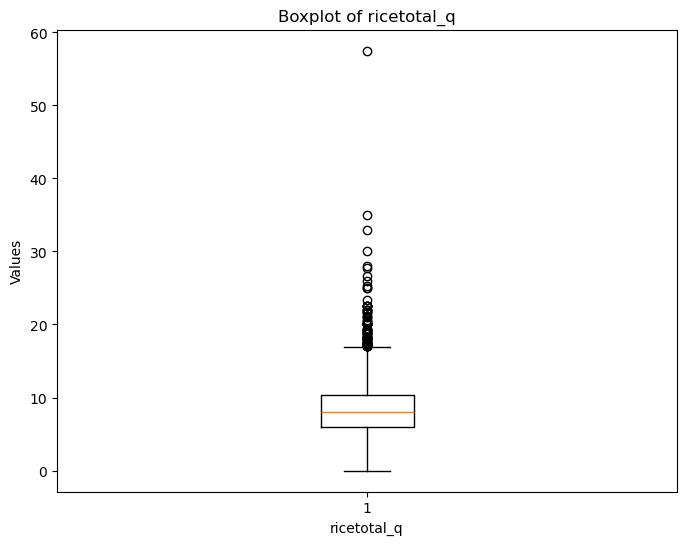

In [214]:
import matplotlib.pyplot as plt
# Assuming WB_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(WB_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [215]:
rice1 = WB_clean['ricetotal_q'].quantile(0.25)
rice2 = WB_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [216]:
WB_clean=WB_new[(WB_new['ricetotal_q']<=up_limit)&(WB_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x17d49f88b10>,
 'caps': [<matplotlib.lines.Line2D at 0x17d49f8a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d49f88090>],
 'medians': [<matplotlib.lines.Line2D at 0x17d49f8b750>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d49f98190>],
 'means': []}

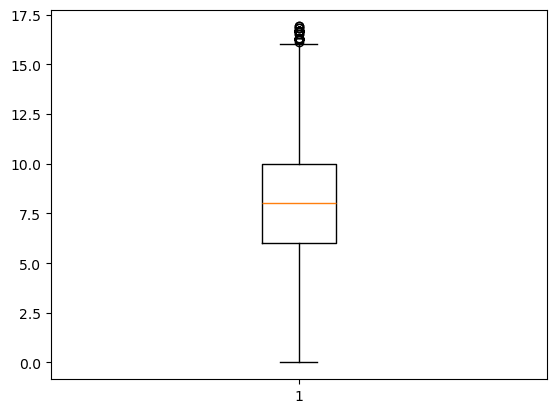

In [217]:
plt.boxplot(WB_clean['ricetotal_q'])

In [218]:
WB_clean['District'].unique()

array([ 7,  4,  5,  6,  3,  1,  2,  8, 16, 18, 11, 17, 19, 15, 13, 12, 14,
       10,  9], dtype=int64)

In [219]:
# Replace values in the 'Sector' column
WB_clean.loc[:,'Sector'] = WB_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [220]:
#total consumption

In [221]:
WB_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [222]:
WB_clean.loc[:, 'total_consumption'] = WB_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\jyoth\AppData\Local\Temp\ipykernel_17580\3234372579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WB_clean.loc[:, 'total_consumption'] = WB_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [223]:
WB_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6218,WB,7,RURAL,2,192,6.250000,3.500000,0.375000,0,0.750000,0.062500,31.463011,36.500000,90.0,78.900511
6219,WB,7,RURAL,2,192,4.571429,2.285714,0.071429,0,0.214286,0.085714,20.178901,34.285714,60.0,61.693187
6220,WB,7,RURAL,2,192,5.625000,1.250000,0.000000,0,0.000000,0.000000,14.793985,9.250000,60.0,30.918985
6221,WB,7,RURAL,2,192,5.777778,1.666667,0.000000,0,0.000000,0.000000,16.100309,8.888889,60.0,32.433642
6222,WB,7,RURAL,2,192,5.000000,3.866667,0.000000,0,0.000000,0.100000,24.567193,0.000000,90.0,33.533860


In [224]:
WB_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              24.938722  51.972724  343.427910  21.625113
2              31.700798  54.852707  550.514346   0.000000
3              64.319723  79.583415  824.786811   0.000000
4              40.703865  64.212879  363.475710   0.000000
5              39.180868  61.640396  424.551915   1.000000

In [225]:
WB_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                37.245323  58.980120  343.427910  21.625113
2                17.755672  49.384858  180.000000  24.850256
3                18.533560  49.571209  157.950862  23.457687
4                29.605777  54.577671  322.634005  24.050200
5                22.198599  53.733198  156.217250   5.000000
6                30.753114  54.916004  353.853227   0.000000
7                25.248808  50.537924  218.126383   9.424176
8                29.331055  55.103173  200.110505  21.250000
9                34.284840  62.544550  359.351575   0.000000
10               42.312004  59.856732  550.514346   0.500000
11               59.722071  78.339201  817.263940   0.000000
12               35.561980  59.826561  287.774367   0.000000
13               40.182419  64.816214  350.250000   1.000000
14               46.632226  63.292239  296.180970  15.750325
15               36.059372  59.332942  424.551915  23.130090
16               51.882490  71.310267  363.475710   0.000000
17               68.432986  90.903510  528.951700   0.000000
18               65.278906  69.343539  824.786811   0.400000
19               35.350772  60.254934  297.797800   2.000000

In [226]:
total_consumption_by_districtcode=WB_clean.groupby('District')['total_consumption'].sum()

In [227]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
11    56874.259759
17    43270.070987
9     33461.334166
Name: total_consumption, dtype: float64

In [228]:
WB_clean.loc[:,"District"] = WB_clean.loc[:,"District"].replace({6: "Maldah", 5: "Dakshin Dinajpur", 7: "Murshidabad"})

In [229]:
total_consumption_by_districtname=WB_clean.groupby('District')['total_consumption'].sum()

In [230]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
11    56874.259759
17    43270.070987
9     33461.334166
Name: total_consumption, dtype: float64

In [231]:
from statsmodels.stats import weightstats as stests

In [232]:
rural=WB_clean[WB_clean['Sector']=="RURAL"]
urban=WB_clean[WB_clean['Sector']=="URBAN"]

In [233]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6218,WB,Murshidabad,RURAL,2,192,6.250000,3.500000,0.375000,0,0.750000,0.062500,31.463011,36.500000,90.0,78.900511
6219,WB,Murshidabad,RURAL,2,192,4.571429,2.285714,0.071429,0,0.214286,0.085714,20.178901,34.285714,60.0,61.693187
6220,WB,Murshidabad,RURAL,2,192,5.625000,1.250000,0.000000,0,0.000000,0.000000,14.793985,9.250000,60.0,30.918985
6221,WB,Murshidabad,RURAL,2,192,5.777778,1.666667,0.000000,0,0.000000,0.000000,16.100309,8.888889,60.0,32.433642
6222,WB,Murshidabad,RURAL,2,192,5.000000,3.866667,0.000000,0,0.000000,0.100000,24.567193,0.000000,90.0,33.533860


In [234]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
52778,WB,18,URBAN,3,193,8.000000,2.000000,0.0,0,0.166667,0.0,19.073853,3.336000,60.0,32.576520
52779,WB,18,URBAN,3,193,8.888889,0.888889,0.0,0,0.000000,0.0,23.678489,20.000000,60.0,53.456267
52780,WB,18,URBAN,3,193,5.000000,2.307692,0.0,0,0.076923,0.0,16.788775,22.307692,54.0,46.481083
52781,WB,18,URBAN,3,193,11.666667,1.666667,0.0,0,0.333333,0.0,30.433923,10.000000,60.0,54.100590
52782,WB,18,URBAN,3,193,10.000000,0.600000,0.0,0,0.000000,0.0,25.800858,22.000000,90.0,58.400858


In [235]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [236]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 17.81960746005611
P-Value: 4.978462124026744e-71
